In [1]:
import numpy as np
import matplotlib.pyplot as plt

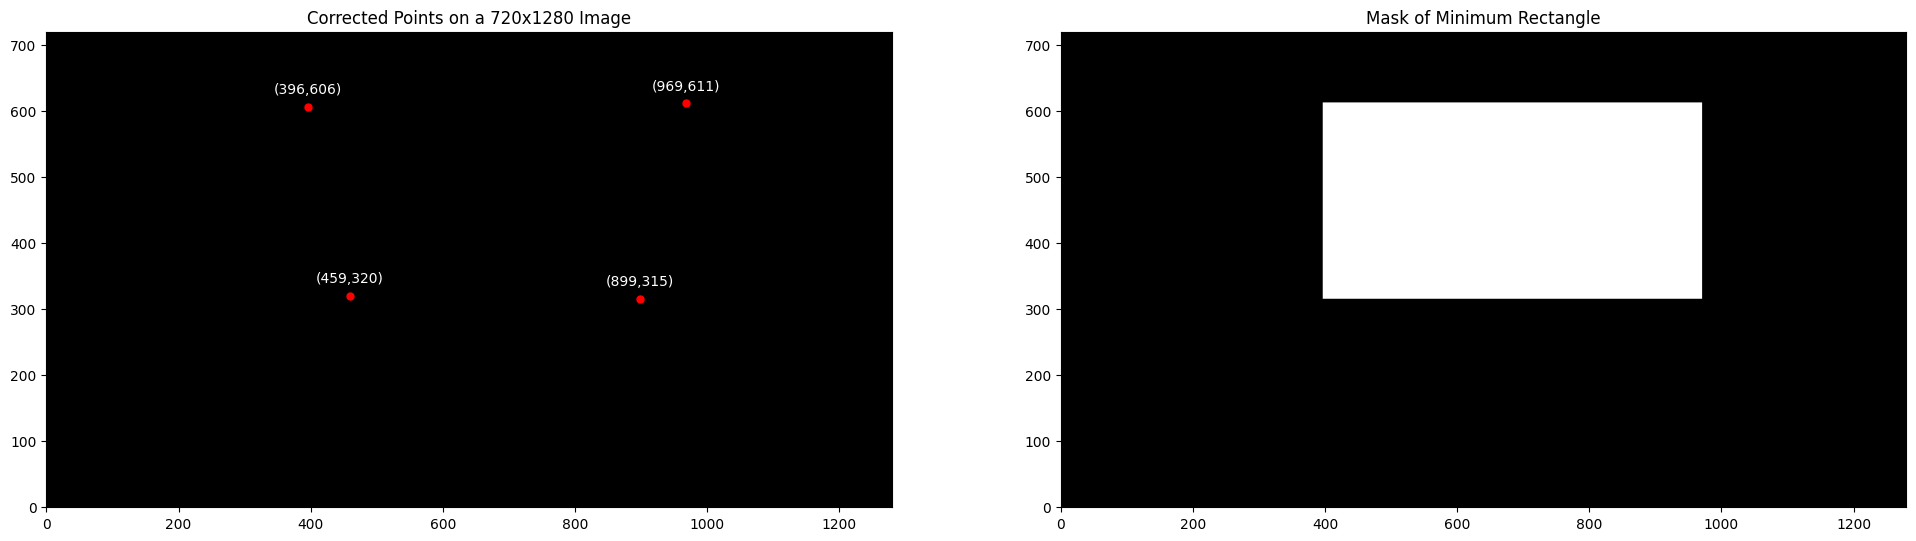

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_min_rectangle_mask(uv_coords, mask_size):
    """
    生成一个由四个给定UV坐标确定的最小矩形mask。
    参数:
    uv_coords: numpy数组，形状为(4, 2)，表示四个点的UV坐标。
    mask_size: 一个元组，表示mask的尺寸（height, width）。
    返回:
    mask: 生成的矩形mask，1表示矩形内的点，0表示其他。
    """
    min_u, min_v = np.min(uv_coords, axis=0)
    max_u, max_v = np.max(uv_coords, axis=0)
    mask = np.zeros(mask_size, dtype=np.uint8)
    start_row, end_row = int(min_v), int(max_v)
    start_col, end_col = int(min_u), int(max_u)
    mask[start_row:end_row+1, start_col:end_col+1] = 1
    return mask

# 更新UV坐标
# uv_coords = np.array([(574, 133), (565, 502), (892, 517), (821, 96)])
uv_coords = np.array([(587, 185), (579, 575), (910, 570), (831, 182)])
uv_coords = np.array([(459, 320), (396, 606), (969, 611), (899, 315)])
# mask的尺寸
mask_size = (720, 1280)

# 生成mask
mask = generate_min_rectangle_mask(uv_coords, mask_size)

# 创建一个720*1280的图像
image = np.zeros((720, 1280), dtype=np.uint8)

# 使用matplotlib绘制点和标注
fig, axs = plt.subplots(1, 2, figsize=(24, 12))

# 绘制点位置
axs[0].imshow(image, cmap='gray', origin='lower')
for u, v in uv_coords:
    axs[0].plot(u, v, 'ro', markersize=5)  # 绘制点
    axs[0].text(u, v + 20, f'({u},{v})', color='white', ha='center')  # 在点上方标注坐标
axs[0].set_title('Corrected Points on a 720x1280 Image')

# 绘制mask
axs[1].imshow(mask, cmap='gray', origin='lower')
axs[1].set_title('Mask of Minimum Rectangle')

plt.show()


In [4]:
plt.imsave("mask3.png",mask)
np.save("mask3.npy", mask)